# Tutorial 3 Solution

## DBSCAN Algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Install hdbscan using anaconda command prompt
# conda install -c conda-forge hdbscan

## Step 1

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

## Step 2
We create a dataset with only two features so that we can visualize it easily. For creating the dataset, we have created a function <b>PointsInCircum</b> which takes the radius and number of data points as arguments and returns an array of data points which when plotted forms a circle. We do this with the help of sin and cosine curves.


In [4]:
# Give a seed to generate the random numbers
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n = 100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30), 
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)]

## Step 3
One circle won’t be sufficient to see the clustering ability of DBSCAN. So we have created three concentric circles of different radii. we also add noise to this data so that we can see how different types of clustering algorithms deals with noise.

In [5]:
# Creating data points in the form of a circle
df1 = pd.DataFrame(PointsInCircum(500, 1000))
df2 = pd.DataFrame(PointsInCircum(300, 700))
df3 = pd.DataFrame(PointsInCircum(100, 300))

# Adding noise to the dataset
df4 = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])

df = pd.concat([df1, df2, df3, df4])

# Display the dataframe
df.head()
#df.info()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


## Step 4
Let’s plot these data points and see how they look in the feature space. Here, we use the scatter plot for plotting these data points. Use the following syntax:

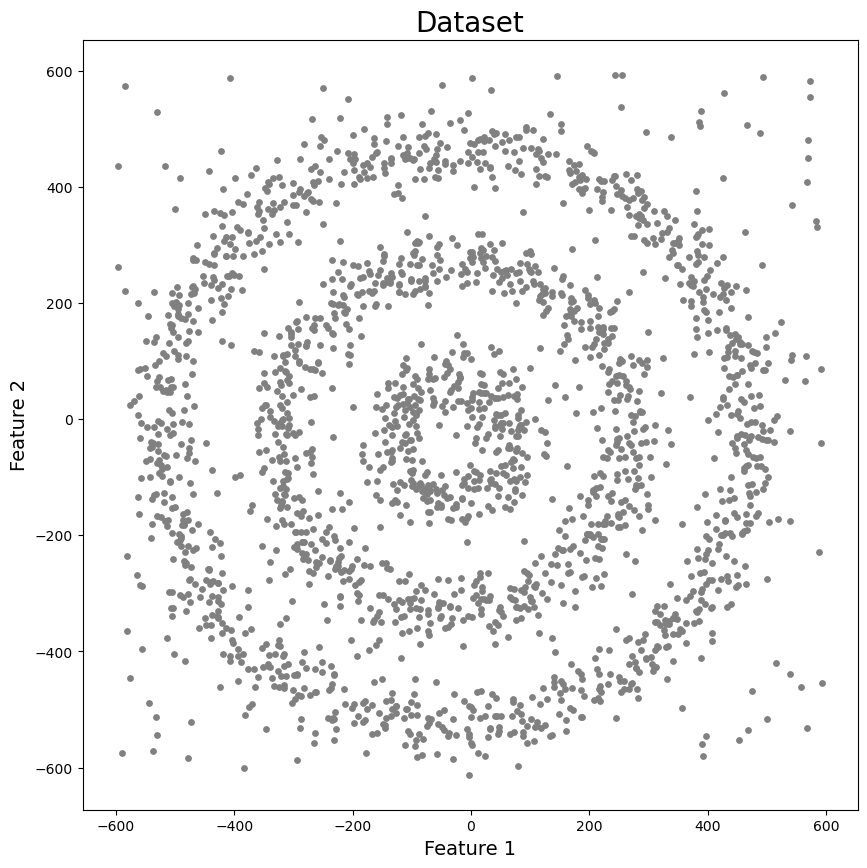

In [6]:
# Set the size of the figure
plt.figure(figsize = (10, 10))

# Draw a scatter plot for the dataframe (df)
plt.scatter(df[0], df[1], s = 15, color = 'grey')
plt.title('Dataset',fontsize = 20)
plt.xlabel('Feature 1',fontsize = 14)
plt.ylabel('Feature 2',fontsize = 14)
plt.show()

## K-Means vs. Hierarchical vs. DBSCAN Clustering

In [7]:
from sklearn.cluster import KMeans

# Initialise k_means by calling an object KMeans()
k_means = KMeans(n_clusters = 4, random_state = 42)

# Train the model using fit() method
k_means.fit(df[[0, 1]])

KMeans(n_clusters=4, random_state=42)

In [8]:
# Create an additional column in the dataframe (df) as KMeans_labels
df['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df.head()

,0,1,KMeans_labels
0,484.891555,-31.006357,3
1,489.391178,21.973916,3
2,462.886575,-27.599889,3
3,517.218479,5.588090,3
4,455.669049,1.982181,3


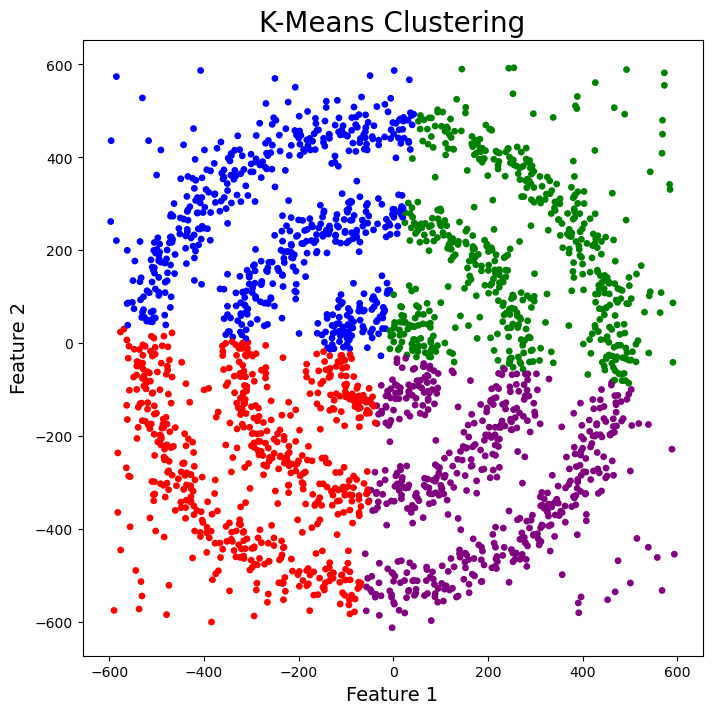

In [9]:
# Plotting resulting clusters 
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (8, 8))

# Use scatter function to plot all three columns in the form of circles
plt.scatter(df[0], df[1], c = df['KMeans_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

It is clear that K-means failed to cluster the data points into four clusters. Also, it didn’t work well with noise. Therefore, it is time to try another popular clustering algorithm, i.e., Hierarchical Clustering.

## Hierarchical Clustering
For this article, we perform Agglomerative Clustering but there is also another type of hierarchical clustering algorithm known as Divisive Clustering. Use the following syntax:

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Create an object model
model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean')

# Train the model by calling fit() method
model.fit(df[[0, 1]])

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [11]:
# Add another column into the dataframe (df)
df['HR_labels'] = model.labels_

# Display the dataframe records
df.head()

,0,1,KMeans_labels,HR_labels
0,484.891555,-31.006357,3,1
1,489.391178,21.973916,3,2
2,462.886575,-27.599889,3,1
3,517.218479,5.588090,3,1
4,455.669049,1.982181,3,2


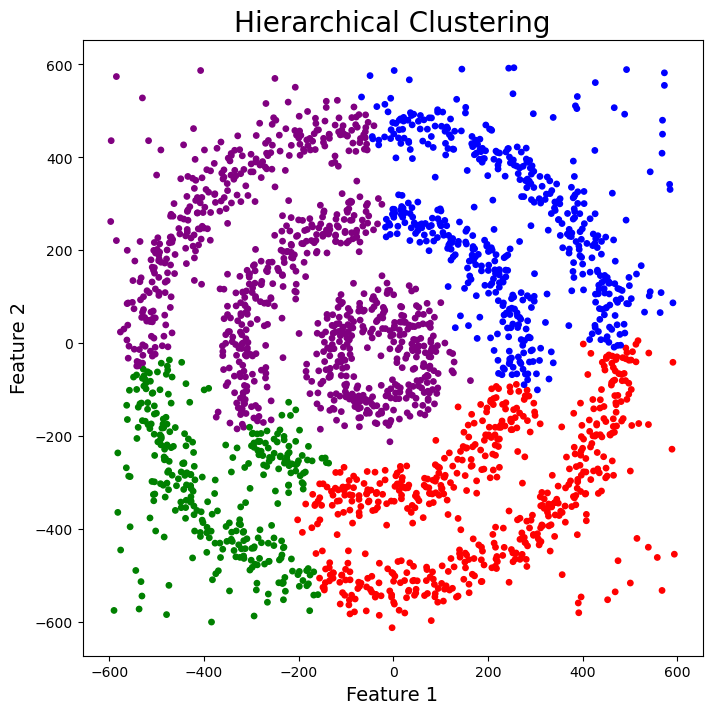

In [12]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (8, 8))

# Use Scatter() function to plot columns with agglomertive clustering
plt.scatter(df[0], df[1], c = df['HR_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('Hierarchical Clustering',fontsize = 20)
plt.xlabel('Feature 1',fontsize = 14)
plt.ylabel('Feature 2',fontsize = 14)
plt.show()

It is better than k-Means clustering, however, the hierarchical clustering algorithm could not develop clear clusters.

## DBSCAN Clustering

In [13]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN()

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(df[[0,1]])

DBSCAN()

In [14]:
# Add another column into the dataframe (df)
df['DBSCAN_labels']=dbscan.labels_ 

# Display the dataframe records
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,3,1,-1
1,489.391178,21.973916,3,2,-1
2,462.886575,-27.599889,3,1,-1
3,517.218479,5.588090,3,1,-1
4,455.669049,1.982181,3,2,-1


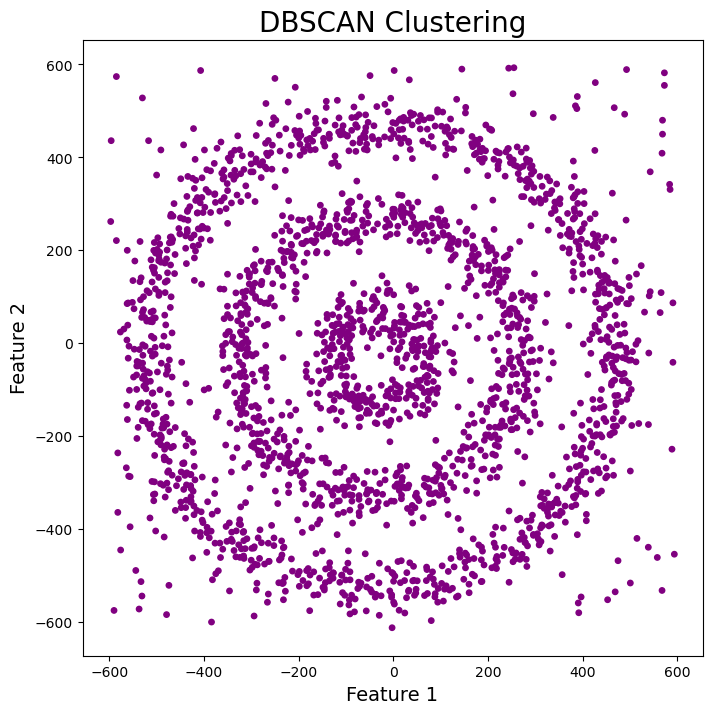

In [15]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (8, 8))
plt.scatter(df[0], df[1], c = df['DBSCAN_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('DBSCAN Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. So we need to find the value of epsilon and minPoints and then train our model again.
For epsilon, we are using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [16]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(df[[0,1]])

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(df[[0,1]])

print(distances, indices)

[[ 0.          6.91861074]
 [ 0.         10.80836526]
 [ 0.          7.56030267]
 ...
 [ 0.         25.77071121]
 [ 0.         23.34523506]
 [ 0.         37.73592453]] [[   0  993]
 [   1 2237]
 [   2    5]
 ...
 [2297  210]
 [2298 2139]
 [2299 2059]]


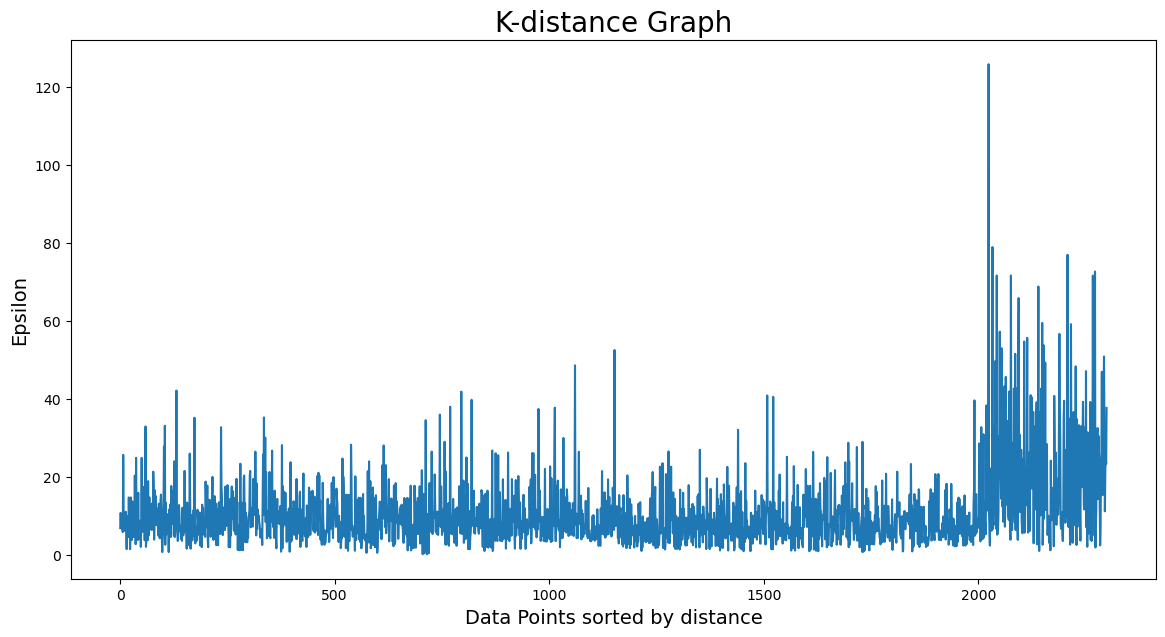

In [17]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

It is clear that the optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now we can find the value of minPoints. The value of minPoints also depends on domain knowledge. Suppose we take minPoints as 6.

In [18]:
from sklearn.cluster import DBSCAN

# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 30, min_samples = 6)

# Train the model by calling a method fit()
dbscan_opt.fit(df[[0, 1]])

DBSCAN(eps=30, min_samples=6)

In [19]:
# Add another column into the dataframe (df)
df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. So 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

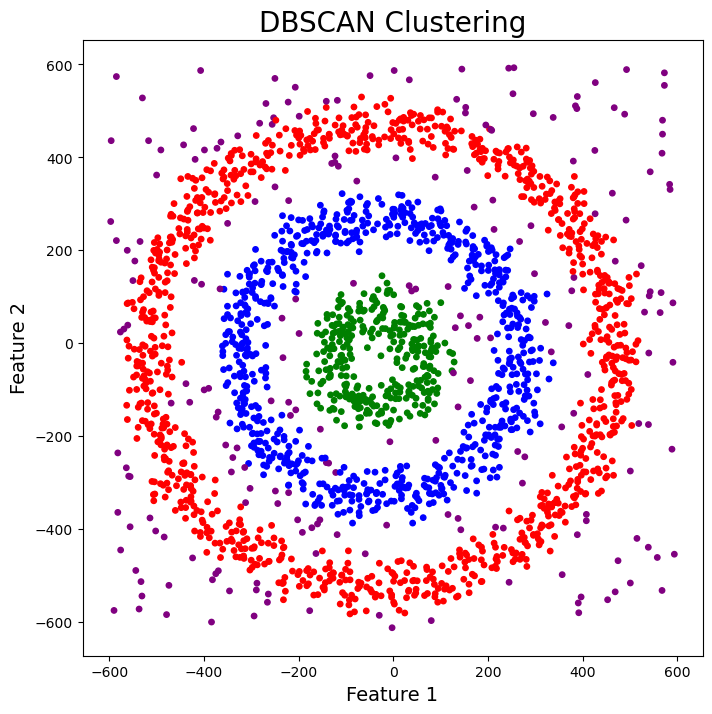

In [20]:
# Plotting the resulting clusters
plt.figure(figsize = (8, 8))
plt.scatter(df[0], df[1], c = df['DBSCAN_opt_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

DBSCAN clustered the data points into three clusters, and it also detected noise in the dataset represented by the purple color.

It is clear that DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.

# Task 1
Use Wine data set (Available on Moodle) to perform clustering usinf DBSCAN algorithm. Plot the clusters and compare with K-Means and Agglomerative clustring.

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Load Wine data set
wine_df = pd.read_csv("wine_data.csv")
# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


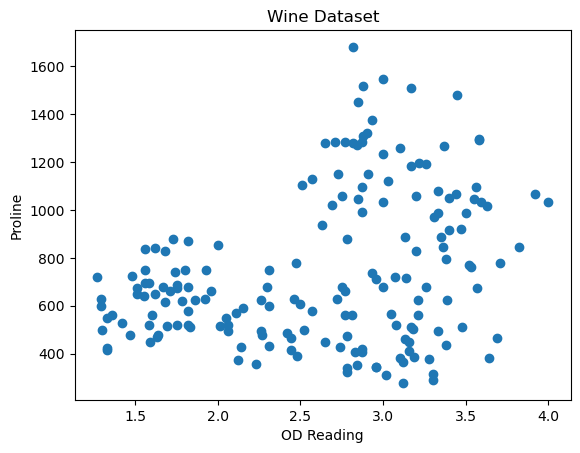

In [23]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [24]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df) 
# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

In [25]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[40,5]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  40 Min Samples:  5
DBSCAN Clustering:  0.5739675293567901


In [26]:
# Generate clusters using DBSCAN
db = DBSCAN(eps = 40, min_samples = 5)
db_clusters = db.fit_predict(wine_df)

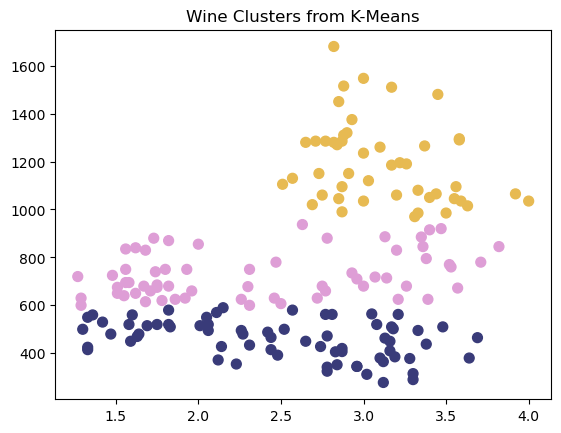

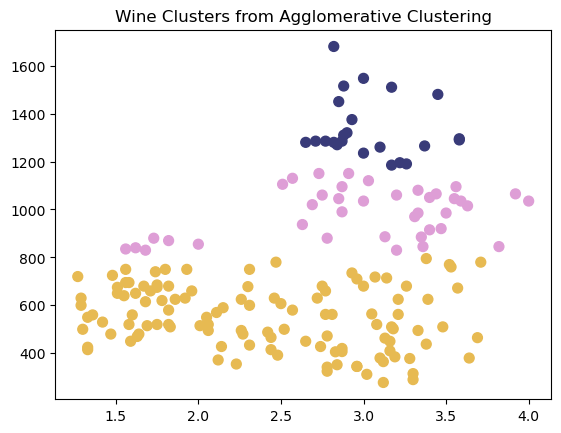

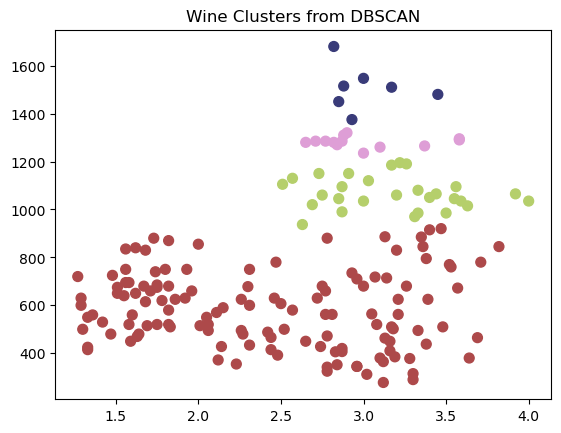

In [27]:
plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=db_clusters,s=50, cmap='tab20b')
plt.show()

In [28]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))
print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462
DBSCAN Clustering:  0.5739675293567901


## Reference:
1. <p>https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py</p>
2. <p>https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/</p>
3. <p>https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/?ref=rp</p>